In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
import numpy as np

In [8]:
col_names_of_interest = ["CMPD_CHEMBLID", "CANONICAL_SMILES", "STANDARD_VALUE"]

df = pd.read_table("bioactivity-19_11_29_01.xls")
print(df.shape)
print(df.drop_duplicates().shape)

unique_chemldIDs = df["CMPD_CHEMBLID"].unique()
print("There are {} unique chembl IDs in {} total rows".format(unique_chemldIDs.shape[0], df.shape[0]))

df = df.dropna(subset=col_names_of_interest) # Remove missing values
df = df.drop_duplicates(subset=["CMPD_CHEMBLID"])

print("#missing values by column (before cleaning):", {name : df[name].isna().sum() for name in col_names_of_interest})
print("Cleaned dataset has shape {}".format(df.shape))
print("#missing values by column (after cleaning):", {name : df[name].isna().sum() for name in col_names_of_interest})

df.to_csv("bioactivity_clean.csv", index=False)

(3901, 61)
(3901, 61)
There are 3176 unique chembl IDs in 3901 total rows
#missing values by column (before cleaning): {'CMPD_CHEMBLID': 0, 'CANONICAL_SMILES': 0, 'STANDARD_VALUE': 0}
Cleaned dataset has shape (2250, 61)
#missing values by column (after cleaning): {'CMPD_CHEMBLID': 0, 'CANONICAL_SMILES': 0, 'STANDARD_VALUE': 0}


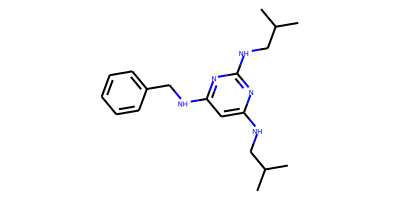

In [22]:
# Draw a random smile

m = Chem.MolFromSmiles(df["CANONICAL_SMILES"].sample().values[0])
from rdkit.Chem import AllChem
import rdkit.Chem as Chem
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
from rdkit.Chem import rdDepictor

def draw_pretty_pics(mol):
    rdDepictor.Compute2DCoords(mol)
    mc_mol = rdMolDraw2D.PrepareMolForDrawing(mol, kekulize=True)
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 200)
    drawer.DrawMolecule(mc_mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText().replace("svg:", "")
    return SVG(svg)

draw_pretty_pics(m)

In [12]:
import pandas as pd

training_data = pd.read_csv("training_data_raw.csv")
test_data = pd.read_csv("test_data_clean.csv")

In [11]:
training_data.to_csv("training_data_raw.csv", index=False)
test_data.to_csv("test_data_clean.csv", index=False)

In [14]:
test_data

,Compound ID,Structure
0,CHEMBL389907,CS(=O)(=O)c1ccc(cc1)c2sc3cc(O)ccc3c2Oc4ccc(OCC...
1,CHEMBL3657177,CN(C)CCOc1ccc(Cn2c(c(C)c3cc(O)ccc23)c4ccc(O)cc...
2,CHEMBL187069,Oc1ccc(cc1)c2noc3ccc(O)cc23
3,CHEMBL3427394,OC(=O)\C=C\c1ccc(CC2=C(C(=O)Oc3cc(O)ccc23)c4cc...
4,CHEMBL397343,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H]5CC[C@]34CCO...
5,CHEMBL200719,c1ccc(cc1)c2[nH]c3ccccc3c2c4ccccc4
6,CHEMBL1087418,Oc1ccc2C3=C([C@@H](Oc2c1)c4ccc(OCCN5CCCCCC5)cc...
7,CHEMBL365016,C\C=C/c1cc(O)cc2nc(oc12)c3ccc(O)cc3
8,CHEMBL46740,Cc1c(c2ccc(O)cc2)n(Cc3ccc(OCCN4CCCCCC4)cc3)c5c...
9,CHEMBL240227,C[C@H](CCc1ccc(O)cc1)NC(=O)Cc2c(c3ccccc3)n(Cc4...
